
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [2]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.csv` file and show a short description

In [3]:
url = 'regression_example.csv'
df = pd.read_csv(url)
df.head()


,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


In [4]:
print(df.shape)

(843, 10)


In [5]:
# drop the useless column 
df.drop(columns=['idx'], inplace=True)
df.head()
print(df.shape)

(843, 9)


In [6]:
# drop the rows with useless entry points
df.dropna(axis=0, inplace = True)
print(df.shape)

(570, 9)


In [7]:
# split the data 
X, y = df.drop(columns=['response']), df['response']

print(X.shape)
print(y.shape)

(570, 8)
(570,)


## Data Exploration and preparation

##### Show a short description of the columns

##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

#### Drop data that are useless or not usable

## Choose the target and split the data into *predicting variables* `X` and *target* `y`

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

In [8]:
X.shape

(570, 8)

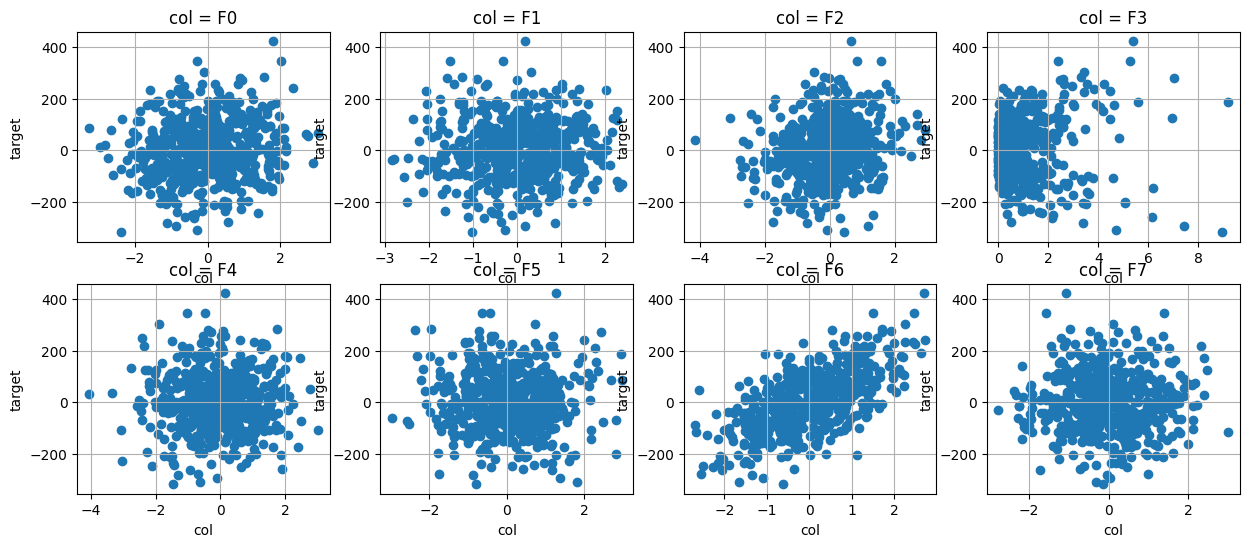

In [9]:
plt.figure(figsize=(15, 6))
pos = 1

for col in X.columns:
    
    plt.subplot(2, 4, pos)
    plt.scatter(X[col], y)
    plt.title(f"col = {col}")
    plt.ylabel('target')
    plt.xlabel('col')
    plt.grid()
    
    pos += 1
    
plt.show()
    

In [59]:
# F6 is the attribute more linearly correleted with target 

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [10]:
from sklearn.model_selection import train_test_split

train_size = .7
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=random_state, train_size=train_size)

print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(399, 8) (171, 8) (399,) (171,)


## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

<Axes: >

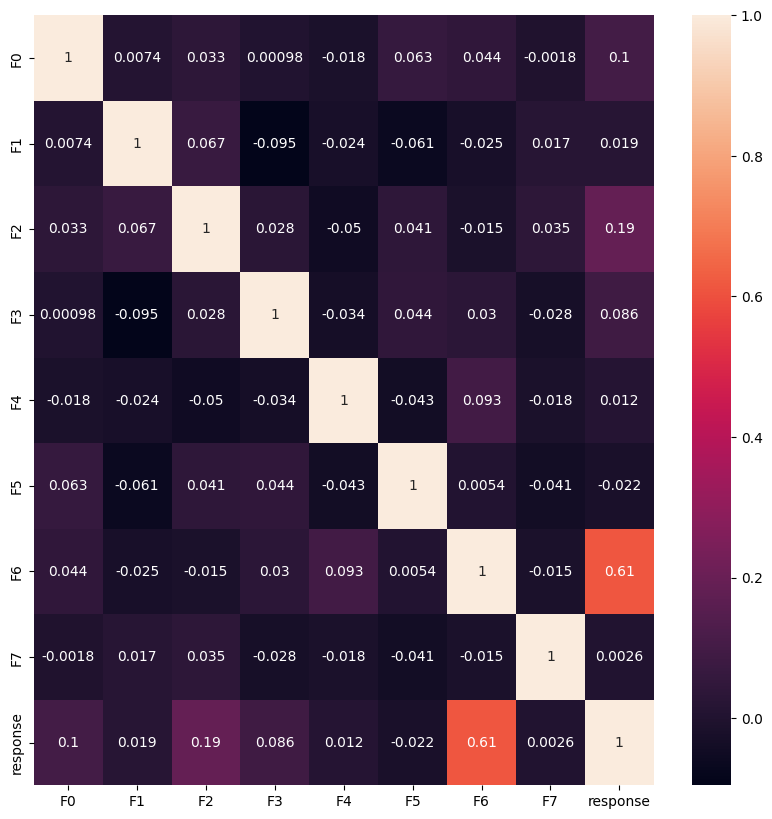

In [11]:
plt.figure(figsize=(10,10))

import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [12]:
Xtrain_lm = Xtrain['F6'].values.reshape(-1,1)
Xtest_lm = Xtest['F6'].values.reshape(-1,1)

print(Xtrain_lm.shape, Xtest_lm.shape)

(399, 1) (171, 1)


### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [13]:
lm = linear_model.LinearRegression()
lm.fit(Xtrain_lm, ytrain)
ypred_lm = lm.predict(Xtest_lm)

In [14]:
pd.DataFrame({'variables': 'F6', 'coefficients': lm.coef_})

,variables,coefficients
0,F6,73.966168


#### Compute the quality measures

In [15]:
mse = mean_squared_error(ypred_lm, ytest, squared = False)
r2 = r2_score(ypred_lm, ytest)
print(mse, r2)

85.1217441119596 -0.17276497987193884


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [18]:
lm_multi = linear_model.LinearRegression()
lm_multi.fit(Xtrain, ytrain)
ypred_lm_multi = lm_multi.predict(Xtest)

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

#### Compute the quality measures

In [20]:
mse = mean_squared_error(ypred_lm_multi, ytest, squared = False)
r2 = r2_score(ypred_lm_multi, ytest)
print(mse, r2)

81.10416774345711 -0.05096217889633259


In [68]:
pd.DataFrame({'variables': Xtrain.columns, 'coefficients': lm_multi.coef_})

,variables,coefficients
0,F0,9.225329
1,F1,2.794846
2,F2,21.766171
3,F3,3.299594
4,F4,-5.532386
5,F5,-6.002884
6,F6,72.949625
7,F7,-2.675824


## Decision Tree Multivariate Regresson

In [21]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [22]:
dt = DecisionTreeRegressor(random_state=random_state)
dt.fit(Xtrain, ytrain)
maxdepth = dt.tree_.max_depth
ypred_dt = dt.predict(Xtest)

print(f"the maximum depth is {maxdepth}")

the maximum depth is 22


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [*range(1,maxdepth+1)]}

dt_gscv = GridSearchCV(estimator = DecisionTreeRegressor(random_state=random_state), 
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error')
dt_gscv.fit(Xtrain, ytrain)
dt_best = dt_gscv.best_estimator_
best_depth = dt_best.tree_.max_depth
ypred = dt_best.predict(Xtest)
mse = mean_squared_error(ypred, ytest, squared = False)

print(f"the best depth is {best_depth}, mse = {mse}")

the best depth is 2, mse = 89.82720761576854


#### Show the tree

[Text(0.5, 0.8333333333333334, 'x[6] <= 0.493\nsquared_error = 13809.026\nsamples = 399\nvalue = 0.479'),
 Text(0.25, 0.5, 'x[6] <= -1.071\nsquared_error = 9807.563\nsamples = 282\nvalue = -38.248'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8030.323\nsamples = 57\nvalue = -115.58'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8359.033\nsamples = 225\nvalue = -18.658'),
 Text(0.75, 0.5, 'x[6] <= 1.68\nsquared_error = 11125.64\nsamples = 117\nvalue = 93.823'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8971.137\nsamples = 102\nvalue = 76.235'),
 Text(0.875, 0.16666666666666666, 'squared_error = 9369.573\nsamples = 15\nvalue = 213.419')]

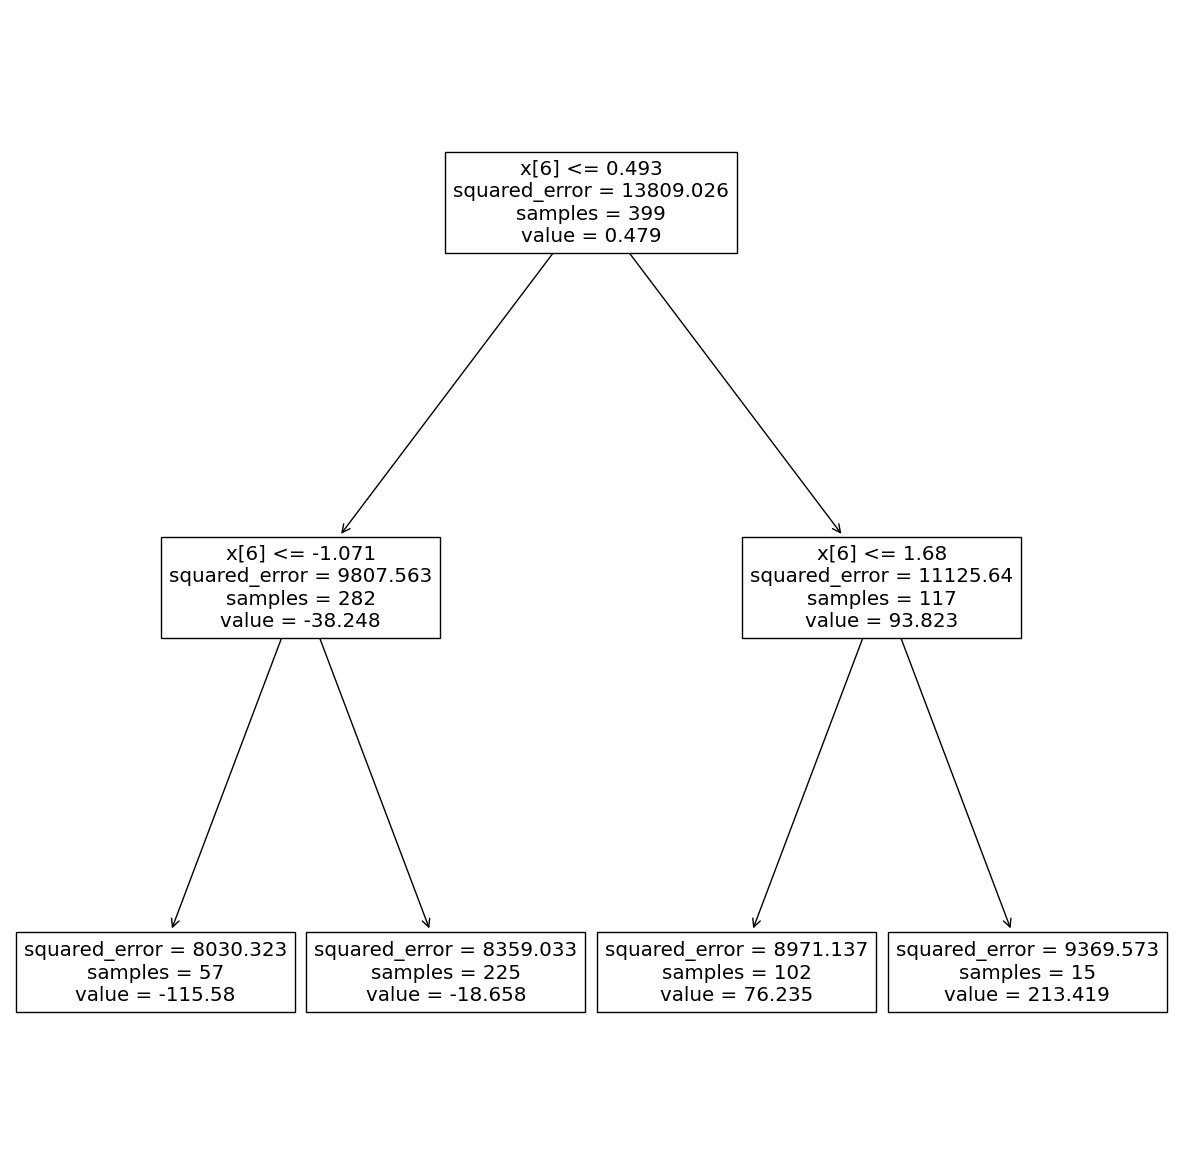

In [24]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

plt.figure(figsize=(15,15))
plot_tree(dt_best)

## Random Forest Multivariate Regresson

In [74]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor

In [75]:
params_grid = {'max_depth': [*range(1, maxdepth)]}
rf_gscv = GridSearchCV(estimator = RandomForestRegressor(random_state=random_state), param_grid=param_grid, scoring='neg_mean_squared_error')
rf_gscv.fit(Xtrain, ytrain)
rf_best = rf_gscv.best_estimator_
best_depth = rf_best.max_depth

print(f"the best depth is {best_depth}")

the best depth is 3


In [76]:
ypred_rf = rf_best.predict(Xtest)
mse = mean_squared_error(ypred_rf, ytest, squared=False)
print(mse)

84.70123424142166


### Plot the prediction of every model, compare it with the real test set, and print the metrics $R^2$ and RMSE 

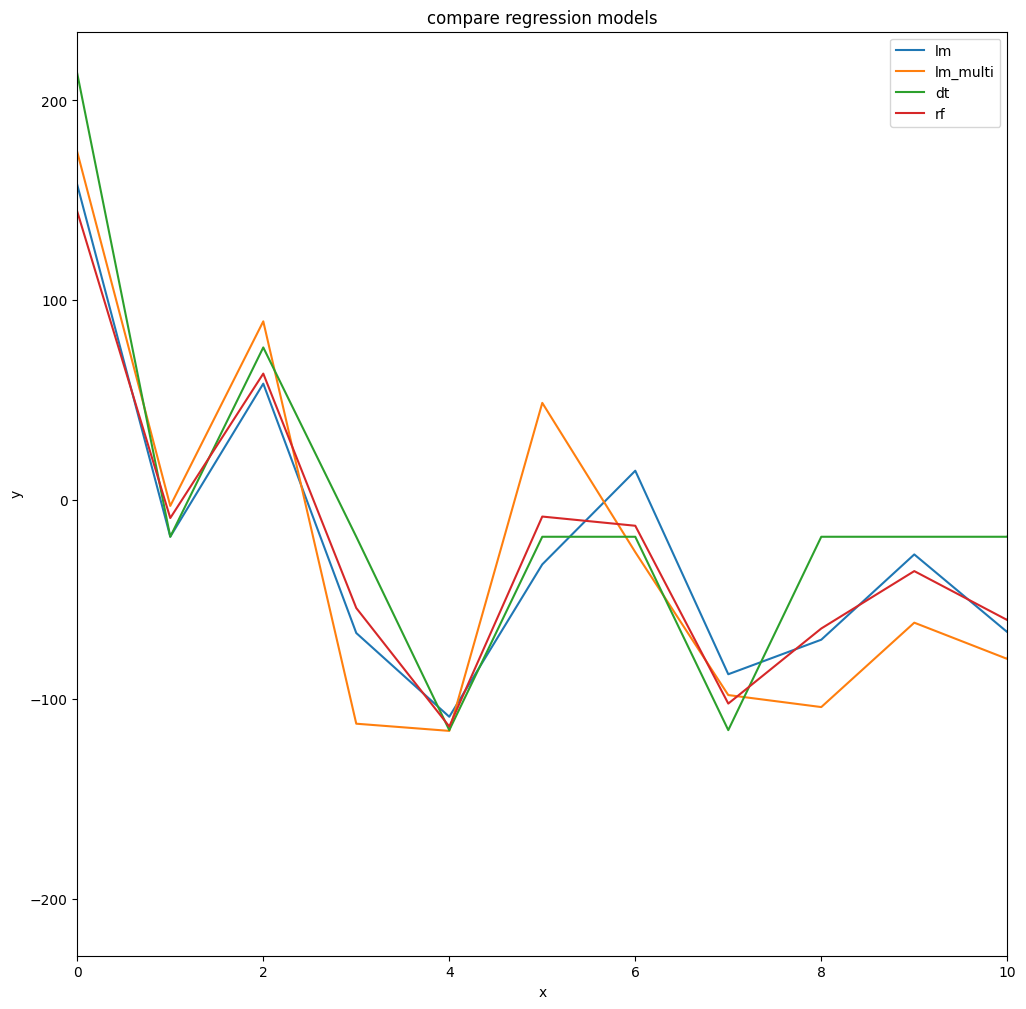

In [77]:
plt.figure(figsize=(12,12))
#plt.plot(ytest)
plt.plot(ypred_lm)
plt.plot(ypred_lm_multi)
plt.plot(ypred_dt)
plt.plot(ypred_rf)
plt.title('compare regression models')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.legend([
    #'target', 
    'lm', 'lm_multi', 'dt', 'rf'])
plt.show()

## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results